In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas
import plotly.graph_objects as go

     |████████████████████████████████| 1.0 MB 4.5 MB/s 
     |████████████████████████████████| 6.3 MB 40.3 MB/s 
     |████████████████████████████████| 16.7 MB 305 kB/s 


In [ ]:
usa = pd.read_csv('https://raw.githubusercontent.com/nmonozon/modeling-covid-19/main/Datasets/covid-19-us.csv')

# converting to datetime object so we can graph against time easier
usa['date'] = pd.to_datetime(usa['date'])
usa.head()

,date,day,cases,deaths
0,2020-01-26,1,5,0
1,2020-01-27,2,5,0
2,2020-01-28,3,5,0
3,2020-01-29,4,5,0
4,2020-01-30,5,6,0


**Cumulative Cases**





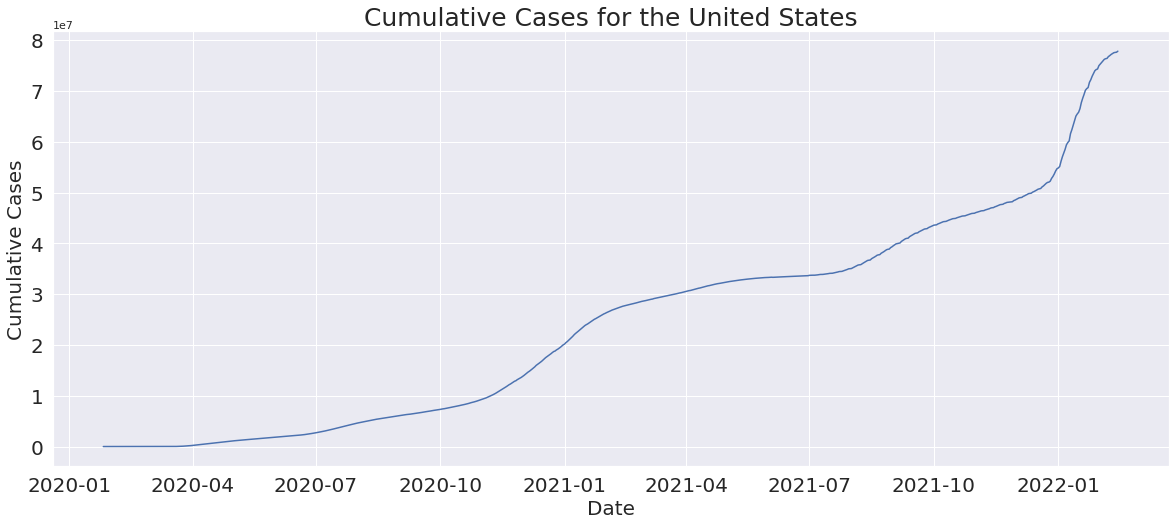

In [ ]:
sns.set(rc = {"figure.figsize":(20,8)})
fig1 = sns.lineplot(x=usa["date"], y=usa["cases"])
fig1.set_xlabel("Date", fontsize = 20)
fig1.set_ylabel("Cumulative Cases", fontsize = 20)
fig1.set_title("Cumulative Cases for the United States", fontsize = 25)
fig1.tick_params(labelsize=20)

**Cumulative Deaths**

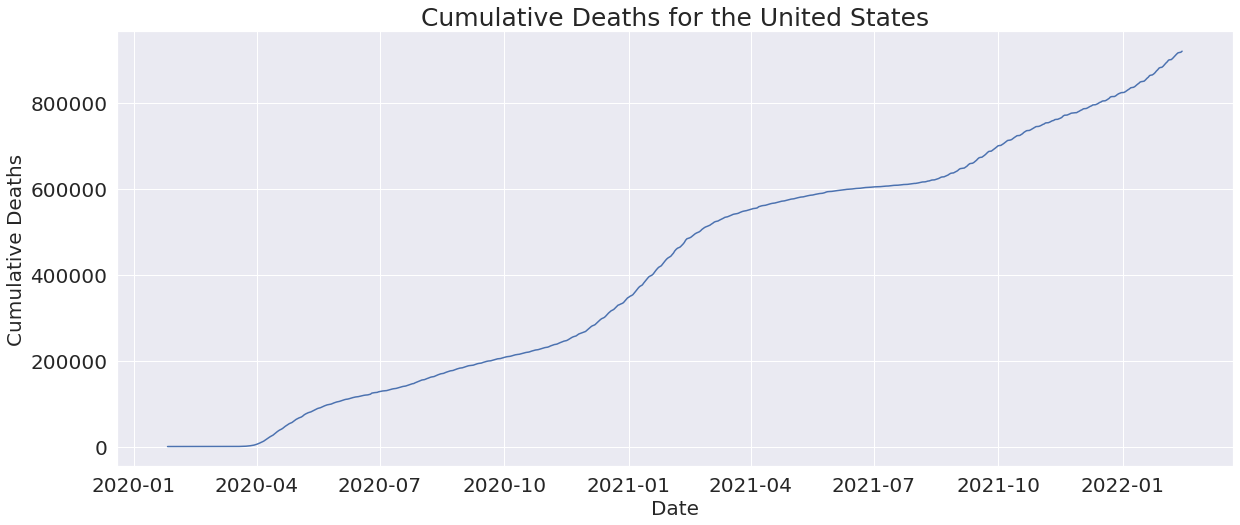

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})
fig1 = sns.lineplot(x=usa['date'], y=usa['deaths'])
fig1.set_xlabel("Date", fontsize = 20)
fig1.set_ylabel("Cumulative Deaths", fontsize = 20)
fig1.set_title("Cumulative Deaths for the United States", fontsize = 25)
fig1.tick_params(labelsize=20)

**Cases + Deaths tg?**

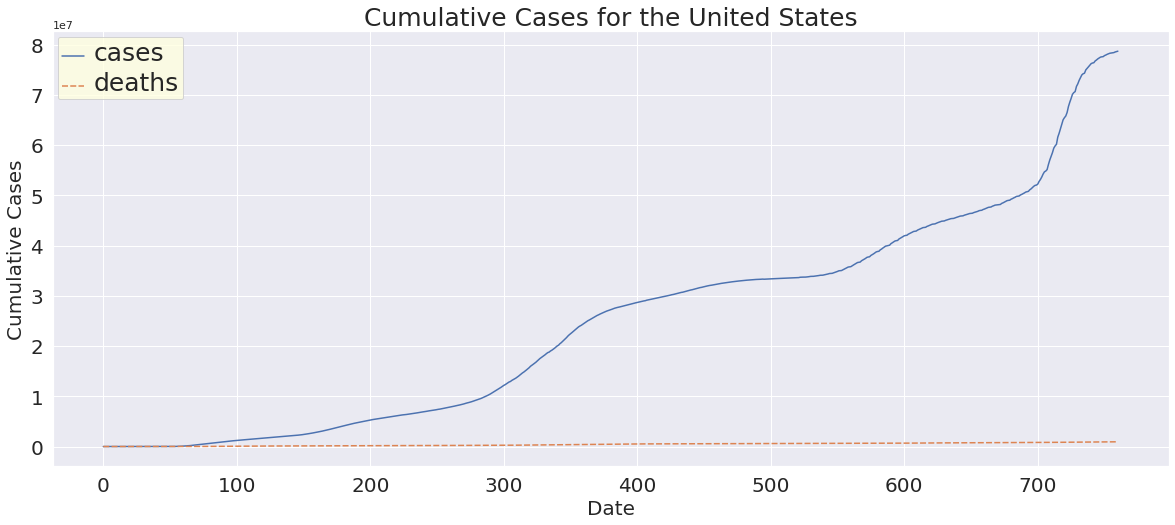

In [ ]:
sns.set(rc = {"figure.figsize":(20,8)})
fig1 = plt.subplots()
fig1 = sns.lineplot(data = usa[["cases", "deaths"]])

fig1.set_xlabel("Date", fontsize = 20)
fig1.set_ylabel("Cumulative Cases", fontsize = 20)
fig1.set_title("Cumulative Cases for the United States", fontsize = 25)
fig1.tick_params(labelsize=20)

# legend editing
legend = plt.legend()
# background color
frame = legend.get_frame()
frame.set_facecolor("lightyellow")
# font size
plt.setp(fig1.get_legend().get_texts(), fontsize='25') 

plt.show()

**Daily Increases - Cases and Deaths (7 day average)**

In [ ]:
usa_newcases = [0] * len(usa)
usa_newdeaths = [0] * len(usa)
for i in range(1, len(usa) - 1):
  usa_newcases[i + 1] = usa["cases"].iloc[i + 1] - usa["cases"].iloc[i]
  usa_newdeaths[i + 1] = usa["deaths"].iloc[i + 1] - usa["deaths"].iloc[i]

usa["new_cases"] = usa_newcases
usa["new_deaths"] = usa_newdeaths

usa["rolling_newcases"] = usa["new_cases"].rolling(window = 7).mean()
usa["rolling_newdeaths"] = usa["new_deaths"].rolling(window = 7).mean()


In [ ]:
# checking real quick i did it right
usa.head(50) 

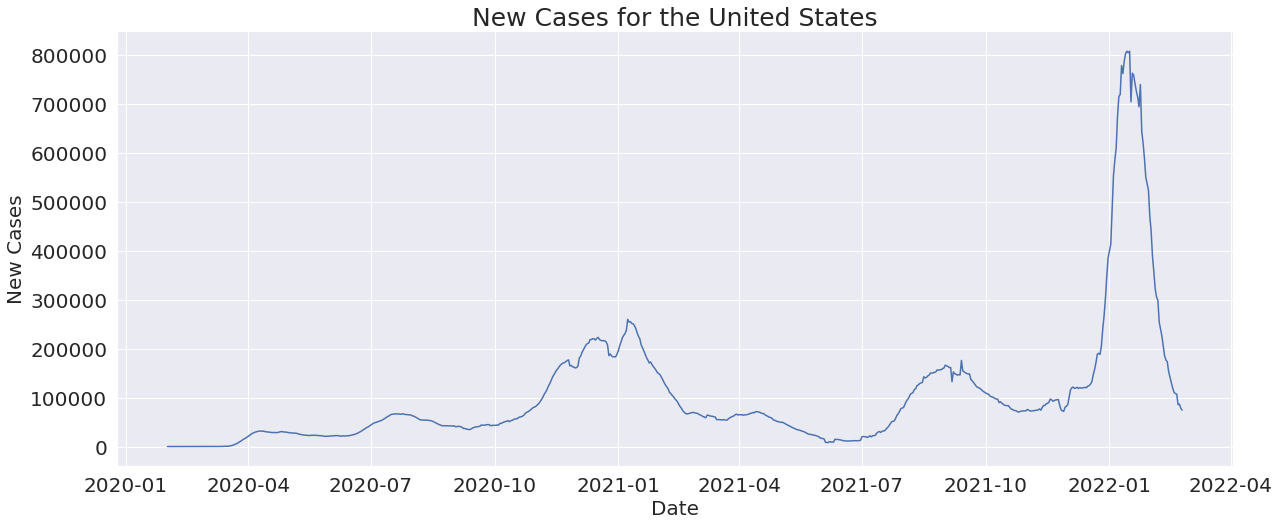

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})
fig1 = sns.lineplot(x=usa['date'], y=usa['rolling_newcases'])
fig1.set_xlabel("Date", fontsize = 20)
fig1.set_ylabel("New Cases", fontsize = 20)
fig1.set_title("New Cases for the United States", fontsize = 25)
fig1.tick_params(labelsize=20)

spike: increase in number of cases around 2020 november when alpha variant hit

spike: 2021-7: time delta variant

spike 2021-12: time omicron hit


vaccine approved in late 2020 

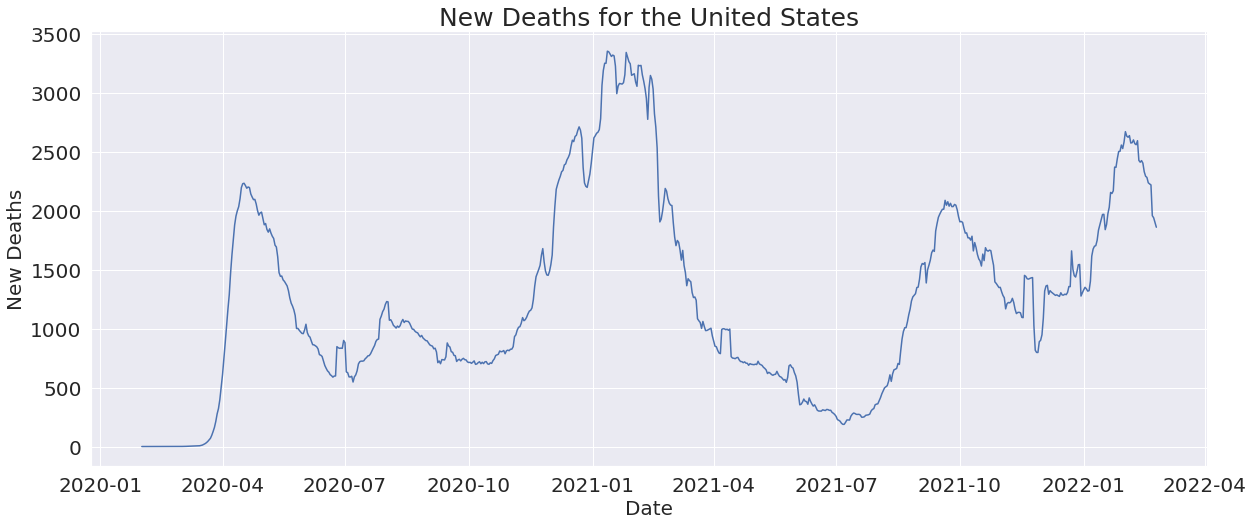

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})
fig1 = sns.lineplot(x=usa['date'], y=usa['rolling_newdeaths'])
fig1.set_xlabel("Date", fontsize = 20)
fig1.set_ylabel("New Deaths", fontsize = 20)
fig1.set_title("New Deaths for the United States", fontsize = 25)
fig1.tick_params(labelsize=20)

spike in deaths in the beginning as well as where the new variant hit

**Deaths Per Case Ratio**

In [ ]:
usa["death_case_ratio"] = usa["deaths"]/usa["cases"]
usa["rolling_deathcaseratio"] = usa["death_case_ratio"].rolling(window = 7).mean()

usa.head(100)

,date,day,cases,deaths,new_cases,new_deaths,rolling_newcases,rolling_newdeaths,death_case_ratio,rolling_deathcaseratio
0,2020-01-26,1,5,0,0,0,NaN,NaN,0.000000,NaN
1,2020-01-27,2,5,0,0,0,NaN,NaN,0.000000,NaN
2,2020-01-28,3,5,0,0,0,NaN,NaN,0.000000,NaN
3,2020-01-29,4,5,0,0,0,NaN,NaN,0.000000,NaN
4,2020-01-30,5,6,0,1,0,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
95,2020-04-30,96,1075756,63140,30357,2210,28949.142857,1987.428571,0.058694,0.057114
96,2020-05-01,97,1109726,64902,33970,1762,28553.285714,1934.571429,0.058485,0.057405
97,2020-05-02,98,1139200,66485,29474,1583,27848.428571,1879.714286,0.058361,0.057674
98,2020-05-03,99,1165340,67816,26140,1331,27763.428571,1890.857143,0.058194,0.057957


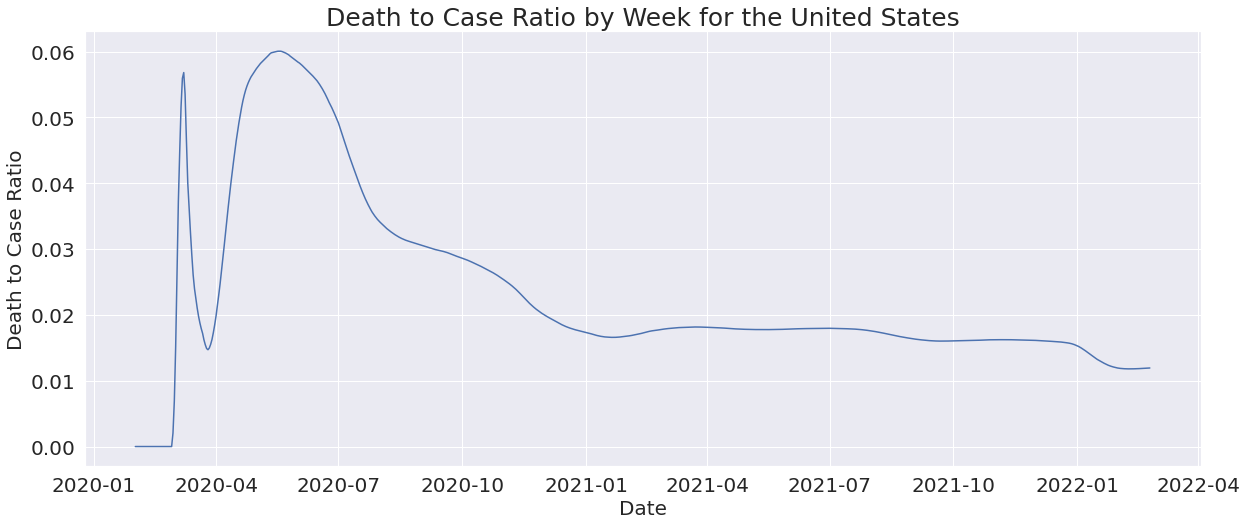

In [ ]:
sns.set(rc = {'figure.figsize':(20,8)})
fig1 = sns.lineplot(x=usa['date'], y=usa['rolling_deathcaseratio'])
fig1.set_xlabel("Date", fontsize = 20)
fig1.set_ylabel("Death to Case Ratio", fontsize = 20)
fig1.set_title("Death to Case Ratio by Week for the United States", fontsize = 25)
fig1.tick_params(labelsize=20)

over time, altho the number of new cases and new deaths have different spikes depending on new variants, the death to case ratio cumulatively over time has stabilized between 1 and 2 percent

page break


we shall now proceed to a map of the USA 🥴 (yo i didn't even know you can put emojis)

In [ ]:
states_og = pd.read_csv("https://raw.githubusercontent.com/nmonozon/modeling-covid-19/main/Datasets/covid-19-states.csv")
states_og.head()

,date,day,state,fips,cases,deaths
0,2020-01-26,1,Arizona,4,1,0
1,2020-01-26,1,California,6,2,0
2,2020-01-26,1,Illinois,17,1,0
3,2020-01-26,1,Washington,53,1,0
4,2020-01-27,2,Arizona,4,1,0


In [ ]:
# state abbreviations dictionary
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

# add the state abbreviations in a column to dataframe
states_og["state_code"] = states_og['state'].map(code)
states_og.head()

,date,day,state,fips,cases,deaths,state_code
0,2020-01-26,1,Arizona,4,1,0,AZ
1,2020-01-26,1,California,6,2,0,CA
2,2020-01-26,1,Illinois,17,1,0,IL
3,2020-01-26,1,Washington,53,1,0,WA
4,2020-01-27,2,Arizona,4,1,0,AZ


In [ ]:
states = states_og.groupby('state_code')
states_case_count = states.describe()['cases']['max'].reset_index()
states_death_count = states.describe()['deaths']['max'].reset_index()
states_death_count.head()

,state_code,max
0,AK,1128.0
1,AL,18102.0
2,AR,10381.0
3,AZ,27876.0
4,CA,84832.0


**TOTAL CASE COUNT**

In [ ]:
# map of total case counts
fig = go.Figure(data=go.Choropleth(
    locations=states_case_count['state_code'], # Spatial coordinates
    z = states_case_count['max'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Cases",
))

fig.update_layout(
    title_text = 'Total Reported Covid Cases by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

**TOTAL DEATH COUNT**

In [ ]:
# map of total death counts
fig = go.Figure(data=go.Choropleth(
    locations=states_case_count['state_code'], # Spatial coordinates
    z = states_death_count['max'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Deaths",
))

fig.update_layout(
    title_text = 'Total Reported Covid Deaths by State',
    geo_scope='usa', 
)

fig.show()

no surprise looks pretty similar to cases since this is purely based on totals

**DEATH TO CASE RATIO** (more interesting prob)

In [ ]:
# map of ratio death/case 
fig = go.Figure(data=go.Choropleth(
    locations=states_case_count['state_code'], # Spatial coordinates
    z = states_death_count['max']/states_case_count['max'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Purples',
    colorbar_title = "Ratio",
))

fig.update_layout(
    title_text = 'Proportion of Total Deaths to Total Cases by State',
    geo_scope='usa', 
)

fig.show()

now this is more intriguing that our top 5 states aren't so top 5 anymore 👀 PA kinda caught lacking